In [1]:
pip install selenium boto3 python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [2]:
import selenium
import boto3
from dotenv import load_dotenv
import os

In [3]:
load_dotenv()

aws_access_key_id = os.getenv('AWS_ID')
aws_secret_access_key = os.getenv('AWS_KEY')
github_token = os.getenv('GITHUB_TOKEN')

s3 = boto3.client('s3',aws_access_key_id = aws_access_key_id, aws_secret_access_key=aws_secret_access_key)

In [4]:
from selenium import webdriver

In [5]:
driver = webdriver.Chrome()

In [6]:
driver.capabilities['chrome']

{'chromedriverVersion': '119.0.6045.105 (38c72552c5e15ba9b3117c0967a0fd105072d7c6-refs/branch-heads/6045@{#1103})',
 'userDataDir': '/var/folders/2z/_rgstgys255b1k3j7qnrtjrw0000gn/T/.org.chromium.Chromium.4Kasdm'}

In [7]:
import sys
sys.path.insert(0,'/Users/cacau/Documents/GitHub/florianopolis_rent_pricing_monitoring/code/src')

In [8]:
def ingest(driver=None, s3=None, all=True, max_pages=None):
    from ingestors import Ingestor

    ingestor = Ingestor(webdriver=driver,
                    cidade='florianopolis',
                    s3=s3) # Instanciando API

    # Chamando a função de ingestão
    ingestor.ingest_pages(
        filename_pattern='page',
        delay_seconds=1.4,
        all=all,
        max_pages=max_pages)
# ingest(s3=s3,driver=driver, max_pages=10, all=False)

In [9]:
def extract(date='2023-12-03',s3=None):
    from extractors import Extractor

    extractor = Extractor(cidade='florianopolis',
                    s3=s3) # Instanciando API

    folder_base_path = 'pipeline/raw/vivareal/florianopolis/'
    folder_path = f'{folder_base_path}{date}'

    extractor.process_folder(bucket_name = 'floriparentpricing',
                        folder_path=folder_path,
                        filename_pattern='processed',
                        output_format='parquet')
dates = ['2023-11-14',
         '2023-11-21',
         '2023-11-28']
# for i in dates:
#     extract(date=i,s3=s3)


- with print: 32.9 18.5 17.5, 18.4
- with logger: 25.7 17.3 16 16.1
- with lists instead of dicts: 20.9 22.9 18.0 18.3
- with global variables: 20.9 18.5 17.5 15.8

In [10]:
# from extractors import Formatter
# formatter = Formatter(s3=s3) # Instanciando API

# # dates = ['2023-11-14',
# #          '2023-11-21',
# #          '2023-11-28']
# # # for i in dates:
# #     # formatter.run(
# #     #     bucket_name='floriparentpricing',
# #     #     datestr=i)

In [11]:
from utils import Aggregator
import pandas as pd
aggregator = Aggregator(s3=s3) # Instanciando API

df = aggregator.run(
        bucket_name='floriparentpricing', export_method='df')

In [12]:
from utils import GithubApi

api = GithubApi(token=github_token,
                owner='strangercacaus',
                repo='florianopolis_rent_pricing_monitoring',
                branch='data')

api.update_file_content(file_path='listings_history.csv',
                        new_content = df,
                        method='overwrite')

2023-12-05 00:27:58,346 - INFO - File updated successfully.


In [13]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


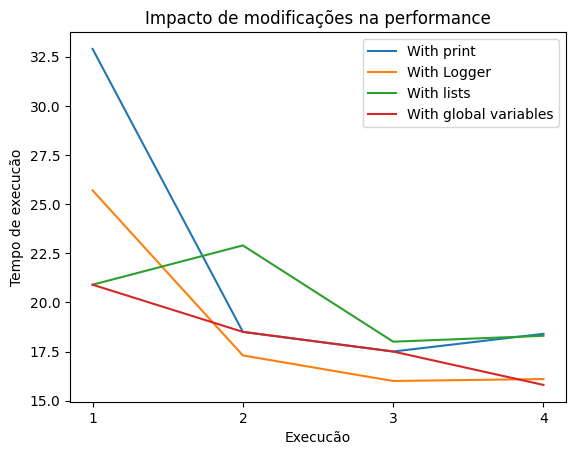

In [14]:
import matplotlib.pyplot as plt
import numpy as np
x = ['1','2','3','4']
y1 = np.array((32.9, 18.5, 17.5, 18.4))
y2 = np.array([25.7 ,17.3 ,16, 16.1])
y3 = np.array([20.9, 22.9 ,18.0, 18.3])
y4 = np.array([20.9, 18.5, 17.5, 15.8])

fig, ax = plt.subplots()
ax.plot(x, y1, label='With print')
ax.plot(x, y2, label='With Logger')
ax.plot(x, y3, label='With lists')
ax.plot(x, y4, label='With global variables')

ax.legend()
ax.set_xlabel('Execucão')
ax.set_ylabel('Tempo de execucão')
ax.set_title('Impacto de modificações na performance')

plt.show()
